# Conjugate gradient

![](../../assets/images/conjgrad_0.jpg "")

## Understanding the Algorithm

The conjugate gradient method is a significant technique in numerical optimization, particularly used for solving large systems of linear equations. It is made for systems whose matrix is symmetric and positive definite. Here is an explanation of its fundamental principles:

### Basic Concept

The conjugate gradient method is an alternative to classical iterative methods like Gauss-Seidel or Jacobi methods. It seeks to minimize (or maximize) a quadratic function, which is often the form of optimization problems in data science and engineering.

### Quadratic Function

Consider a quadratic function of the form:

$ f(x) = \frac{1}{2} x^T A x - b^T x + c $

where $A$ is a symmetric and positive definite matrix, $b$ a vector, and $c$ a constant. The solution to the equation $Ax = b$ is the point where this function reaches its minimum.

### Gradient and Conjugate Direction

- **Gradient:** The gradient of $f(x)$ indicates the direction of the steepest ascent. To find a minimum, one moves in the opposite direction to the gradient.

- **Conjugation:** Directions are said to be conjugated with respect to $A$ if they satisfy a certain orthogonality condition. This property ensures that each movement toward the minimum is as efficient as possible, avoiding redundancies of standard gradient descent methods.

### Algorithm

1. **Initialization:**
   - Define the matrix $A$ of the linear system $Ax = b$ (coefficient matrix).
   - Define the vector $b$ (constant term vector).
   - Define an initial approximation $x_0$ (initial unknown vector).
   - Define a tolerance $\epsilon$ for convergence.
   - Define a maximum number of iterations $N_{\text{max}}$.

2. **Calculation of the initial residue:**
   - Calculate the initial residue $r_0 = b - Ax_0$.

3. **Initialization of variables:**
   - Define the initial search vector $p_0 = r_0$.
   - Define $k = 0$ (current iteration).

4. **Iterations:**
   - While $k < N_{\text{max}}$ and $||r_k|| > \epsilon$:
     - Calculate the product $Ap_k$.
     - Calculate the search step $\alpha_k = \frac{r_k^T r_k}{p_k^T A p_k}$.
     - Update the solution: $x_{k+1} = x_k + \alpha_k p_k$.
     - Update the residue: $r_{k+1} = r_k - \alpha_k A p_k$.
     - Calculate the conjugation coefficient $\beta_k = \frac{r_{k+1}^T r_{k+1}}{r_k^T r_k}$.
     - Update the search vector: $p_{k+1} = r_{k+1} + \beta_k p_k$.
     - Increment $k = k + 1$.

5. **End of the Algorithm:**
   - If $||r_k|| \leq \epsilon$, the algorithm has successfully converged.
   - Otherwise, the algorithm has reached the maximum number of iterations without achieving the desired tolerance.

6. **Result:**
   - The approximate solution $x_k$ is the solution to the system $Ax = b$ with accuracy determined by $\epsilon$.

This algorithm effectively solves linear systems by minimizing the quadratic error between the approximate and real solutions.

## Usage examples

1. **Solving Partial Differential Equations in Computational Science**: In computational science, the conjugate gradient method is widely utilized for solving partial differential equations. These equations frequently arise in numerous scientific and engineering applications, enabling researchers to efficiently simulate complex physical phenomena like fluid flow, heat transfer, and structural analysis.

2. **Unconstrained Optimization Problems and Energy Minimization**: This method is also applied in solving unconstrained optimization problems, including energy minimization tasks. Its flexibility and efficiency make it suitable for a range of optimization challenges.

3. **Solving Large and Sparse Systems of Linear Equations**: In conjunction with generalized and approximate polynomial preconditionings, the conjugate gradient method is effective for addressing large and sparse systems of linear equations. The use of approximate polynomial preconditioning has shown to enhance efficiency compared to generalized polynomials.

4. **Unconstrained Optimization with Modified Fletcher–Reeves Method**: A class of modified Fletcher–Reeves conjugate gradient methods, incorporating Armijo-type line search, is used for generating descent directions in solving unconstrained optimization problems. This demonstrates the method's adaptability and effectiveness in optimization scenarios.

5. **Computational Mechanics on Graphics Processing Units (GPUs)**: The method is employed in computing linear algebra operations and solving linear systems that emerge from the finite element discretization of computational mechanics problems, specifically optimized for execution on Graphics Processing Units (GPUs).

## Strengths

1. **Effective Convergence to Optimal Solution**: One of the primary strengths of the conjugate gradient method is its ability to effectively converge to the optimal solution by iteratively moving along conjugate directions in the solution space.

2. **Strong Convergence Properties with Modest Storage Requirements**: The conjugate gradient method is characterized by its robust convergence properties and relatively modest storage needs. This makes it particularly suitable for large-scale unconstrained optimization problems and applications.

3. **Theoretical Directness in Absence of Round-off Error**: Theoretically, the conjugate gradient method can be considered a direct method because, in the absence of round-off errors, it can produce the exact solution in a finite number of iterations. These iterations are typically not larger than the size of the matrix involved.

4. **Preconditioning for Improved Convergence**: When dealing with matrices that have a large condition number, preconditioning is commonly employed. This process involves replacing the original system with a modified one to ensure a smaller condition number, facilitating faster convergence.

5. **Efficient Initial Iteration and Fast Convergence**: In practical applications, the first stage of iterations is often the fastest, as the error is rapidly eliminated within the initial Krylov subspace. This leads to a fast approach to the required tolerance level in a relatively small number of iterations. Moreover, the use of preconditioning methods helps in ensuring this fast convergence.

6. **Optimization Using Line Search and Steepest Descent Methods**: The conjugate gradient method can be optimized further using line search and steepest descent methods. By making certain substitutions in the algorithm, it's possible to reduce storage requirements, making each iteration slightly less resource-intensive. However, even with these optimizations, the conjugate gradient method generally converges faster compared to other methods.

## Weaknesses

1. **Dependence on Good Preconditioning**: The efficiency of the CG method greatly depends on preconditioning. Preconditioning is a process that transforms the problem into a form more suitable for rapid convergence. However, finding an effective preconditioner can be challenging, and without a good one, the convergence rate of the CG method can be severely impacted, especially for ill-conditioned systems.

2. **Sensitivity to Round-off Errors**: The CG method is sensitive to round-off errors due to its iterative nature. In practice, this means that floating-point arithmetic can affect the accuracy of the solution. The accumulation of these errors over iterations can lead to a significant deviation from the exact solution, particularly in systems with a large number of variables or iterations.

3. **Inefficiency for Non-Sparse Systems**: While CG is highly effective for large, sparse systems (where most elements are zero), its performance degrades for dense systems. This is because the method exploits the sparsity of the matrix to reduce computational complexity. In dense matrices, this advantage is lost, making the CG less efficient compared to other methods.

4. **Convergence Issues for Non-Positive Definite Matrices**: The standard CG method is designed for positive definite matrices. When dealing with non-positive definite (or indefinite) matrices, the method may not converge. This limitation requires modifications or alternative methods for such matrices, limiting its applicability.

5. **Difficulty in Estimating Optimal Iteration Count**: Determining the optimal number of iterations for convergence can be challenging. Too few iterations might not yield an accurate solution, while too many increase computation time unnecessarily. This problem is exacerbated because the rate of convergence is influenced by the properties of the matrix, such as its condition number, which are not always easily assessed.

## Python demonstration

# Conjugate Gradient Method for Quadratic Optimization in 2D

Bellow demonstration shows the application of the Conjugate Gradient (CG) method for solving a quadratic optimization problem in two dimensions. The CG method is particularly efficient for large, sparse systems and is used here to find the minimum of a quadratic function.

## Problem Definition
- We consider a linear system \( Ax = b \), where \( A \) is a 3x3 symmetric positive-definite matrix, and \( b \) is a 3-dimensional vector.
- Our goal is to find the solution vector \( x \) that minimizes the quadratic function \( f(x) = \frac{1}{2}x^T Ax - b^T x + c \), where \( c \) is a scalar constant.
- The CG algorithm is tailored for 2D problems, focusing on the first two dimensions of the solution vector.
- The problem is formulated as `Ax = b`, where `A` is a symmetric positive-definite matrix and `b` is a vector.
- The script initializes the solution vector with random values within specified ranges and fixes one dimension to a known solution for simplicity.
- The quadratic function to be minimized is defined, and the CG method is applied to find its minimum.
- The path of the CG algorithm through the solution space is plotted along with the contours of the quadratic function, demonstrating the convergence behavior of the method.

## Key Components
- `conjugate_gradient_2d`: The main function implementing the CG method.
- `quadratic_function`: Defines the quadratic function to be minimized.
- Visualization: Uses `matplotlib` to plot the contours of the quadratic function and the path of the CG method.


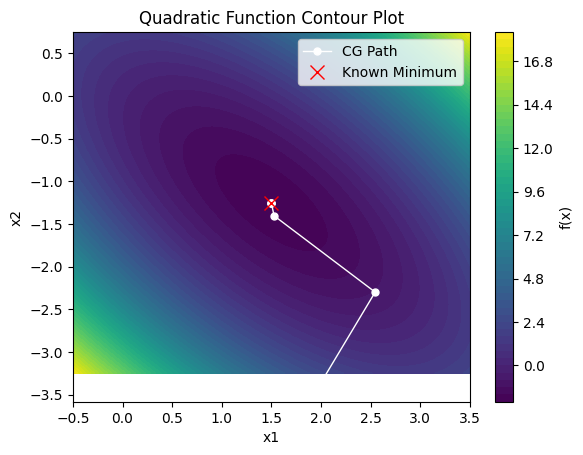

In [311]:
import numpy as np
import matplotlib.pyplot as plt

def conjugate_gradient_2d(A, b, x0=None, tol=1e-20, max_iter=100):
    """
    Conjugate Gradient method for 2D problems (first two dimensions) to solve Ax = b.
    """
    if x0 is None:
        x = np.array([
            np.random.uniform(-0.5, 3.5),  # x1 initialized between -0.5 and 3.5
            np.random.uniform(-3.5, 0.5),  # x2 initialized between -3.5 and 0.5
            known_solution[2]              # x3 fixed at its known solution value
        ], dtype=np.float64)
    else:
        x = x0.astype(np.float64)

    x[2] = known_solution[2]  # Fixing the third dimension to its known solution

    r = b.astype(np.float64) - A @ x  # Residual
    p = r.copy()
    path = [x[:2].copy()]  # To store the path of x (only first two dimensions)
    rs_old = r @ r

    for i in range(max_iter):
        Ap = A @ p
        alpha = rs_old / (p @ Ap)
        x[:2] += alpha * p[:2]  # Update only the first two dimensions
        r -= alpha * Ap
        rs_new = r @ r

        if np.sqrt(rs_new) < tol:
            break  # Convergence criterion

        p = r + (rs_new / rs_old) * p
        rs_old = rs_new
        path.append(x[:2].copy())

    return x, np.array(path)

# Define a symmetric positive-definite matrix A and vector b
n = 3  # Dimension of the system
A = np.array([[3, 2, 0], [2, 3, 1], [0, 1, 3]])
b = np.array([2, 0, 1])
c = 0  # Scalar constant

# Ensure A is symmetric and positive-definite
assert np.allclose(A, A.T, atol=1e-8) and np.all(np.linalg.eigvals(A) > 0)

# The known solution to the minimum is the solution of Ax = b
known_solution = np.linalg.solve(A, b)

# Define the quadratic function
def quadratic_function(x):
    return 0.5 * np.dot(x.T, np.dot(A, x)) - np.dot(b.T, x) + c

cg_solution_2d, cg_path_2d = conjugate_gradient_2d(A, b)

# Restructure the cg_path for plotting
cg_path_x1_2d = cg_path_2d[:, 0]
cg_path_x2_2d = cg_path_2d[:, 1]

# Generate a grid of points for visualization
x1_range = np.linspace(known_solution[0] - 2, known_solution[0] + 2, 100)
x2_range = np.linspace(known_solution[1] - 2, known_solution[1] + 2, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = np.zeros_like(X1)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x = np.array([X1[i, j], X2[i, j], known_solution[2]])  # Fixing the third dimension
        Z[i, j] = quadratic_function(x)

# Plotting the quadratic function
plt.contourf(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(label='f(x)')

plt.plot(cg_path_x1_2d, cg_path_x2_2d, 'wo-', linewidth=1, markersize=5, label='CG Path')
plt.plot(known_solution[0], known_solution[1], 'rx', markersize=10, label='Known Minimum', )
plt.title('Quadratic Function Contour Plot')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Solving Large Systems of Linear Equations

We explore the application of the Conjugate Gradient (CG) method, a cornerstone algorithm in computational mathematics, for solving large systems of linear equations. The CG method is particularly well-suited for systems where the coefficient matrix is large, sparse, symmetric, and positive-definite. These types of matrices frequently arise in various domains such as scientific computing, engineering simulations, and machine learning.

## Problem Statement

We aim to solve a system of linear equations represented as $ Ax = b $, where:
- $ A $ is a symmetric positive-definite matrix.
- $ b $ is a known vector.
- $ x $ is the solution vector we seek to compute.

The challenge lies in efficiently solving this system when $ A $ is of large dimensions, specifically when direct methods (like Gaussian elimination) become computationally infeasible.

## Approach

1. **Matrix and Vector Generation**: We start by generating a synthetic system to demonstrate the process. This involves creating a large symmetric positive-definite matrix $ A $ of size 1000x1000 and a corresponding vector $ b $.

2. **Conjugate Gradient Method**: Utilizing the `scipy.sparse.linalg.cg` function, a part of the SciPy library, we apply the CG method to solve for $ x $ in $ Ax = b $. This iterative method is chosen for its efficiency with large, sparse matrices.

3. **Result Interpretation**: After obtaining the solution, we analyze the convergence of the method and inspect the first few values of the solution vector to verify correctness.

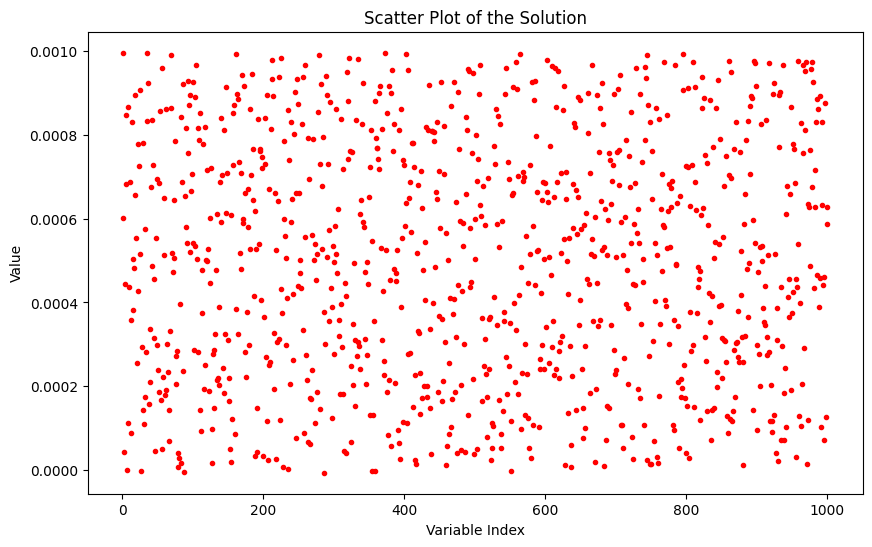

In [303]:
import numpy as np
from scipy.sparse.linalg import cg # Conjugate gradient
from scipy.sparse import rand

# Define the size of the matrix
n = 1000

# Generate a random sparse symmetric positive-definite matrix
# We use a sparse matrix for efficiency in large systems
A = rand(n, n, density=0.01, format='csr')
A = A + A.T + n * np.eye(n)

# Generate a random vector b
b = np.random.rand(n)

# Solve the system Ax = b using conjugate gradient method
x, info = cg(A, b)

# info == 0 indicates successful convergence
solution_status = "successfully solved" if info == 0 else "not converged"

# Indices for the x-axis
indices = np.arange(1, n + 1)

# Create a scatter plot of the solution vector
plt.figure(figsize=(10, 6))
plt.scatter(indices, x, color='red', marker='.')
plt.title('Scatter Plot of the Solution')
plt.xlabel('Variable Index')
plt.ylabel('Value')
plt.show()

End of demonstration

---

## Practical optimization tools

1. [**CGDs (Python):**](https://pypi.org/project/CGDs/) CGDs is a Python package that implements optimization algorithms, including three variants of the Conjugate Gradient Descent (CGD) in PyTorch. It supports Hessian vector product and conjugate gradient, making it suitable for competitive optimization problems such as generative adversarial networks (GANs). CGDs also features distributed training capabilities.

2. [**SciPy (Python):**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html) SciPy, a well-known library in Python, offers a conjugate gradient solver under its `sparse.linalg` module. It is used to solve Ax = b using Conjugate Gradient iteration and supports both sparse matrix and ndarray formats. This tool is particularly effective for problems where the matrix A is hermitian and positive definite.

3. [**Apache Commons Math (Java):**](https://commons.apache.org/proper/commons-math/javadocs/api-3.6.1/org/apache/commons/math3/optimization/general/NonLinearConjugateGradientOptimizer.html) For Java, the NonLinearConjugateGradientOptimizer in the Apache Commons Math library is a notable option. It supports both Fletcher-Reeves and Polak-Ribière update formulas for conjugate search directions and offers optional preconditioning.

4. [**GitHub Projects (Various Languages):**](https://github.com/topics/conjugate-gradient?o=asc&s=stars) A variety of projects on GitHub implement the conjugate gradient algorithm in different languages. Notable examples include a distributed implementation using Apache Spark in Scala, an implementation in Python focusing on optimization algorithms, parallel preconditioned methods in C++, an implementation using SYCL and OpenMP in C++, and a Python wrapper for CG_DESCENT in C.

## Sources
| Sources |
|---------|
| [Conjugate gradient method - Wikipedia](https://en.wikipedia.org/wiki/Conjugate_gradient_method) |
| [What is the conjugate gradient method? - collimator.ai](https://www.collimator.ai/reference-guides/what-is-the-conjugate-gradient-method) |
| [Practical Use of Polynomial Preconditionings for the Conjugate Gradient Method - Semantic Scholar](https://www.semanticscholar.org/paper/Practical-Use-of-Polynomial-Preconditionings-for-Saad/582ceeb434593dc20269751ad0db85f4d272770c) |
| [Conjugate Gradient Methods - Spinger Link](https://link.springer.com/chapter/10.1007/978-3-031-08720-2_5) |
| [Conjugate gradient methods - Cornell university](https://optimization.cbe.cornell.edu/index.php?title=Conjugate_gradient_methods) |